In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [5]:
df=pd.read_csv('/content/pancreatic_cancer_prediction_sample.csv')

In [6]:
df.head()

,Country,Age,Gender,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,...,Stage_at_Diagnosis,Survival_Time_Months,Treatment_Type,Survival_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Processed_Food,Access_to_Healthcare,Urban_vs_Rural,Economic_Status
0,Canada,64,Female,0,0,0,0,0,0,0,...,Stage III,13,Surgery,0,0,Medium,Low,High,Urban,Low
1,South Africa,77,Male,1,1,0,0,0,0,0,...,Stage III,13,Chemotherapy,0,1,Medium,Medium,Medium,Urban,Low
2,India,71,Female,0,0,0,0,0,0,0,...,Stage IV,3,Chemotherapy,1,0,Medium,High,Low,Rural,Middle
3,Germany,56,Male,0,0,0,0,1,0,1,...,Stage IV,6,Radiation,0,1,Low,Low,Medium,Rural,Middle
4,United States,82,Female,0,0,0,0,1,0,0,...,Stage IV,9,Chemotherapy,1,0,Low,Medium,Medium,Rural,Low


In [7]:
#shape of dataset
df.shape

(50000, 24)

#***EDA(Explotary Data Analysis):-***

In [8]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        50000 non-null  object
 1   Age                            50000 non-null  int64 
 2   Gender                         50000 non-null  object
 3   Smoking_History                50000 non-null  int64 
 4   Obesity                        50000 non-null  int64 
 5   Diabetes                       50000 non-null  int64 
 6   Chronic_Pancreatitis           50000 non-null  int64 
 7   Family_History                 50000 non-null  int64 
 8   Hereditary_Condition           50000 non-null  int64 
 9   Jaundice                       50000 non-null  int64 
 10  Abdominal_Discomfort           50000 non-null  int64 
 11  Back_Pain                      50000 non-null  int64 
 12  Weight_Loss                    50000 non-null  int64 
 13  D

In [9]:
#data describe
df.describe()

,Age,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,Abdominal_Discomfort,Back_Pain,Weight_Loss,Development_of_Type2_Diabetes,Survival_Time_Months,Survival_Status,Alcohol_Consumption
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,64.540940,0.299540,0.248260,0.199980,0.099300,0.151680,0.049440,0.199220,0.296500,0.252860,0.349980,0.196220,13.898040,0.128440,0.303460
std,9.973847,0.458061,0.432008,0.399989,0.299067,0.358714,0.216787,0.399418,0.456719,0.434656,0.476968,0.397141,11.272151,0.334582,0.459757
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
75%,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,1.000000,1.000000


In [10]:
#data missing values
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Smoking_History,0
Obesity,0
Diabetes,0
Chronic_Pancreatitis,0
Family_History,0
Hereditary_Condition,0
Jaundice,0


In [11]:
#data duplicated
df.duplicated().sum()

4

In [12]:
#drop the duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
#rename column name Development_of_Type2_Diabetes
df.rename(columns={'Development_of_Type2_Diabetes':'Diabets_Type2','Smoking_History':'Smoking','Diet_Processed_Food':'Diet','Survival_Status':'Survive'},inplace=True)

In [14]:
#check the columns
df.columns

Index(['Country', 'Age', 'Gender', 'Smoking', 'Obesity', 'Diabetes',
       'Chronic_Pancreatitis', 'Family_History', 'Hereditary_Condition',
       'Jaundice', 'Abdominal_Discomfort', 'Back_Pain', 'Weight_Loss',
       'Diabets_Type2', 'Stage_at_Diagnosis', 'Survival_Time_Months',
       'Treatment_Type', 'Survive', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'Diet', 'Access_to_Healthcare',
       'Urban_vs_Rural', 'Economic_Status'],
      dtype='object')

In [15]:
#column list categorical column
col_cate=df.select_dtypes(include='object').columns
col_cate

Index(['Country', 'Gender', 'Stage_at_Diagnosis', 'Treatment_Type',
       'Physical_Activity_Level', 'Diet', 'Access_to_Healthcare',
       'Urban_vs_Rural', 'Economic_Status'],
      dtype='object')

In [16]:
#number columns list
col_num=df.select_dtypes(exclude='object').columns
col_num

Index(['Age', 'Smoking', 'Obesity', 'Diabetes', 'Chronic_Pancreatitis',
       'Family_History', 'Hereditary_Condition', 'Jaundice',
       'Abdominal_Discomfort', 'Back_Pain', 'Weight_Loss', 'Diabets_Type2',
       'Survival_Time_Months', 'Survive', 'Alcohol_Consumption'],
      dtype='object')

In [17]:
#unique column values
for i in col_cate:
  print(i,':',df[i].unique())

Country : ['Canada' 'South Africa' 'India' 'Germany' 'United States' 'Australia'
 'China' 'United Kingdom' 'Brazil']
Gender : ['Female' 'Male']
Stage_at_Diagnosis : ['Stage III' 'Stage IV' 'Stage II' 'Stage I']
Treatment_Type : ['Surgery' 'Chemotherapy' 'Radiation']
Physical_Activity_Level : ['Medium' 'Low' 'High']
Diet : ['Low' 'Medium' 'High']
Access_to_Healthcare : ['High' 'Medium' 'Low']
Urban_vs_Rural : ['Urban' 'Rural']
Economic_Status : ['Low' 'Middle' 'High']


#***Data Visualization:-***

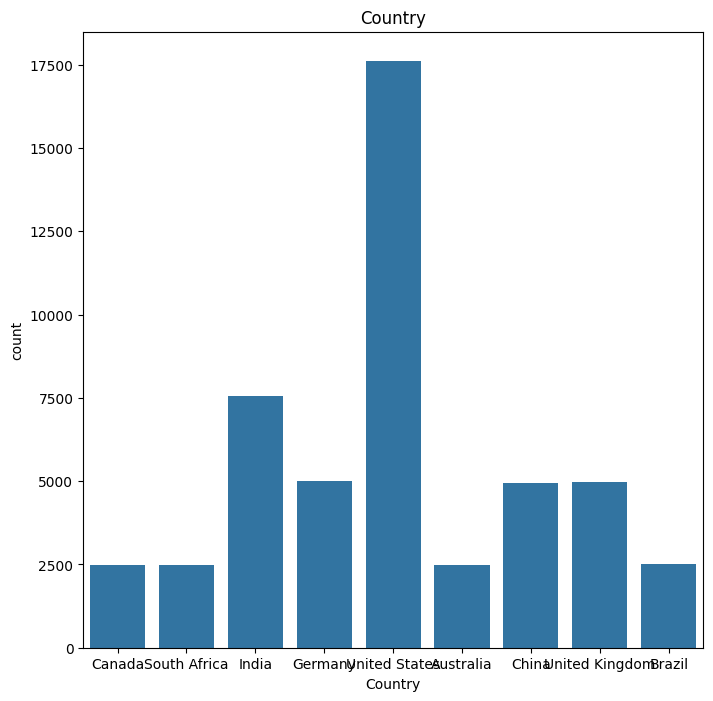

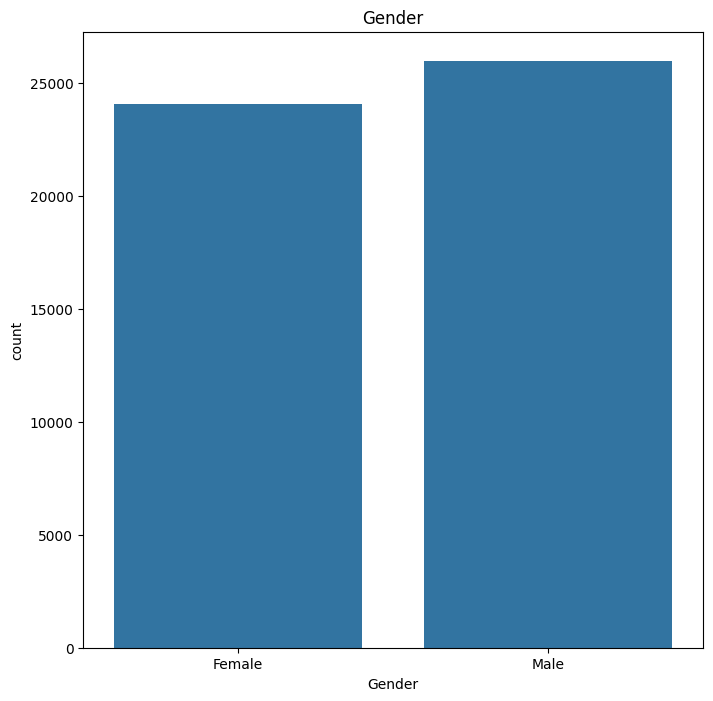

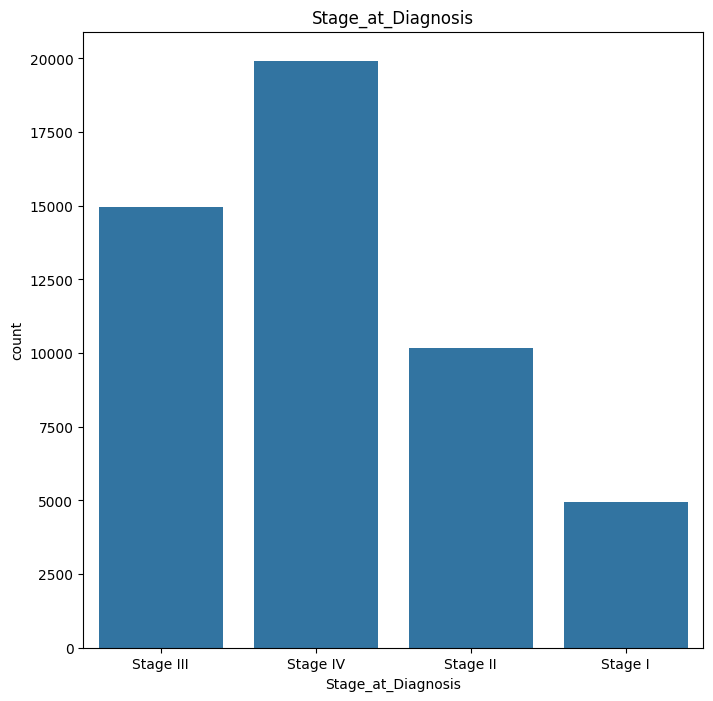

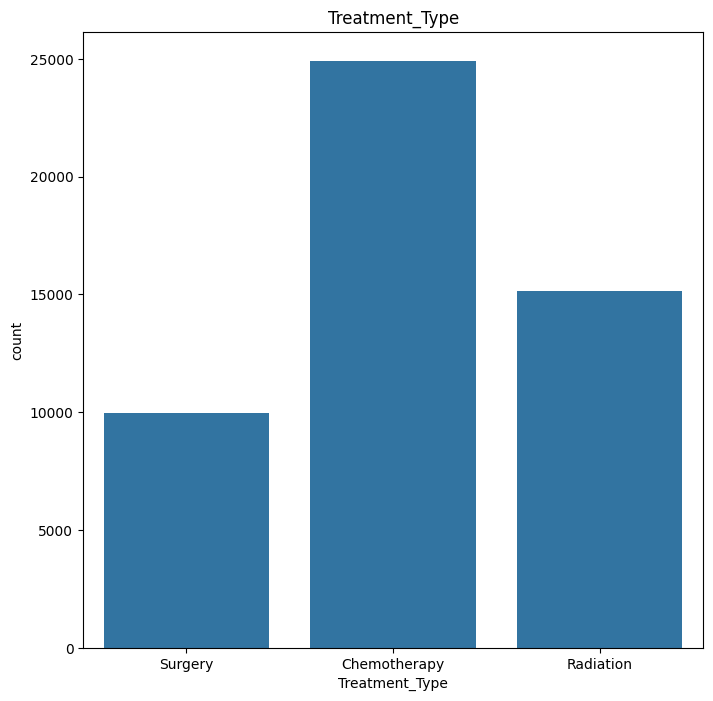

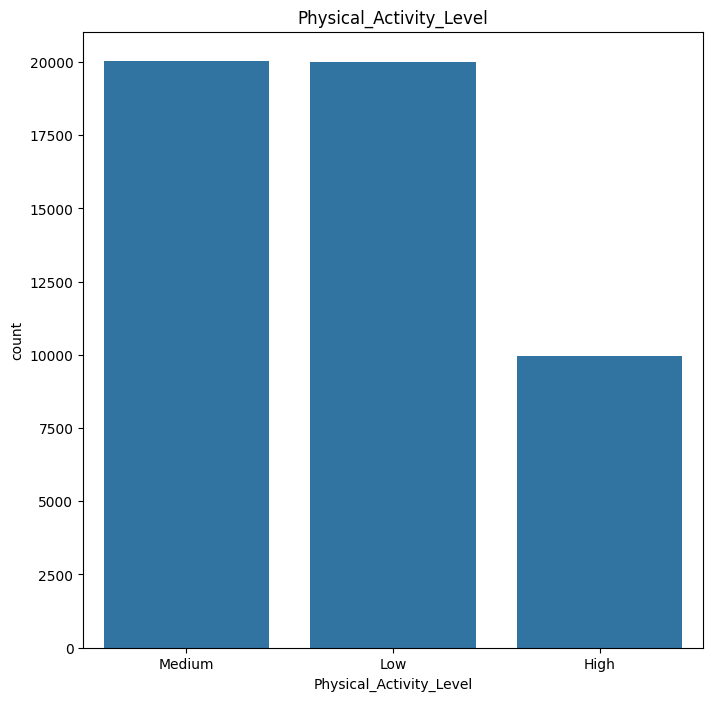

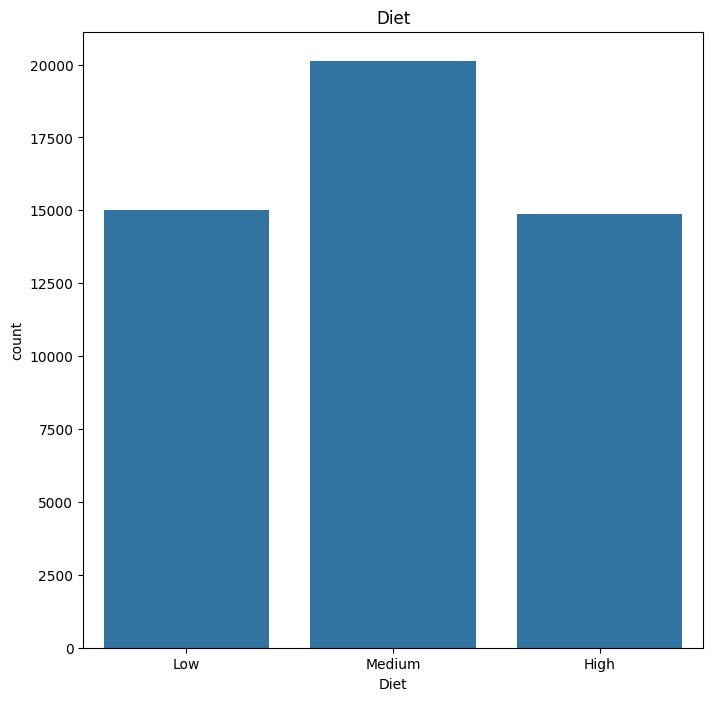

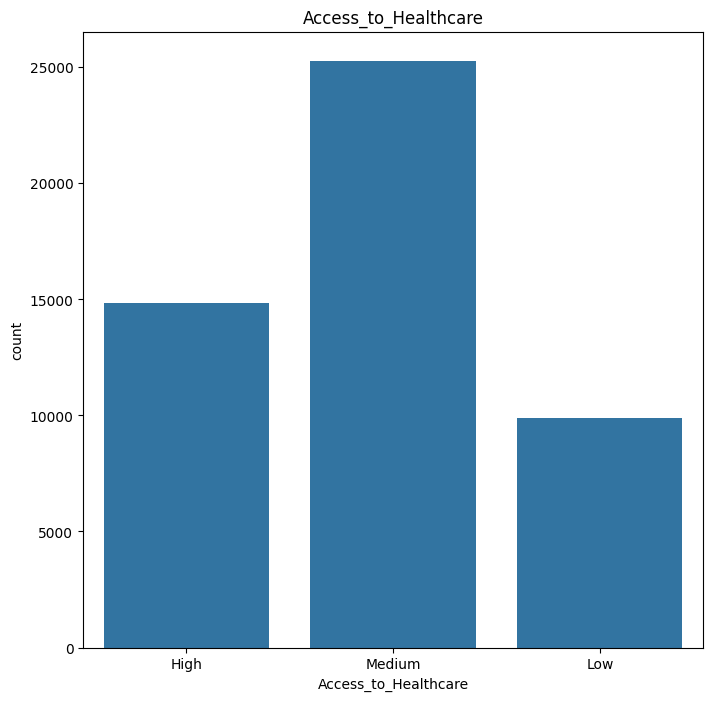

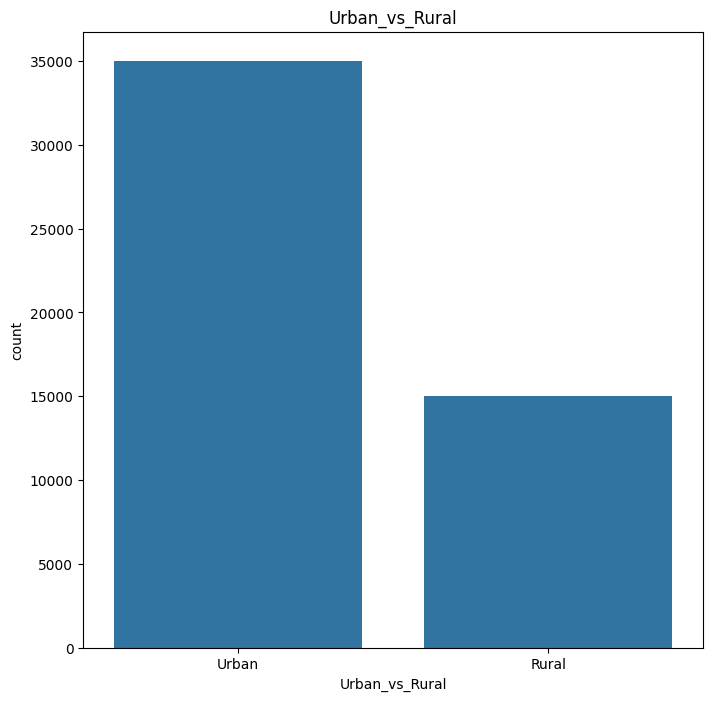

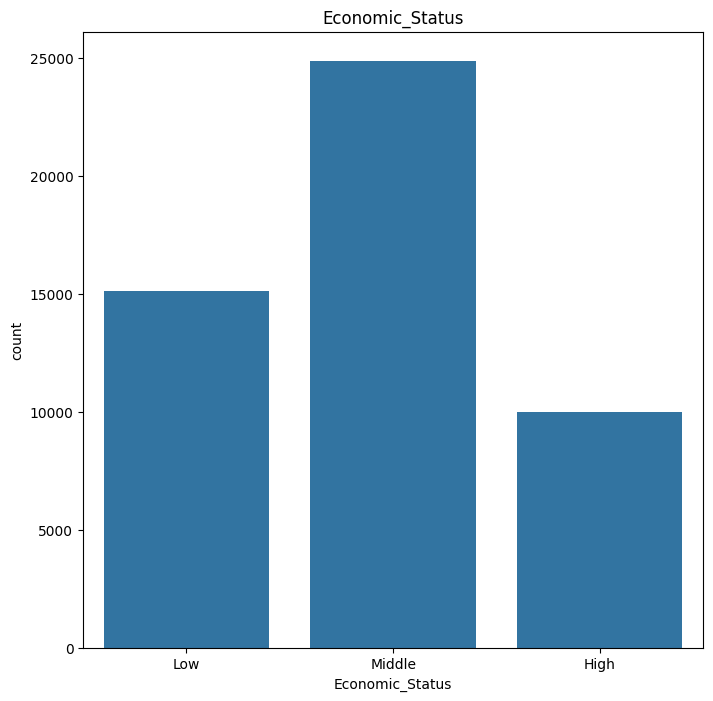

In [18]:
#categorical column bar charts
for i in col_cate:
  plt.figure(figsize=(8,8))
  sns.countplot(x=df[i])
  plt.title(i)
  plt.show()

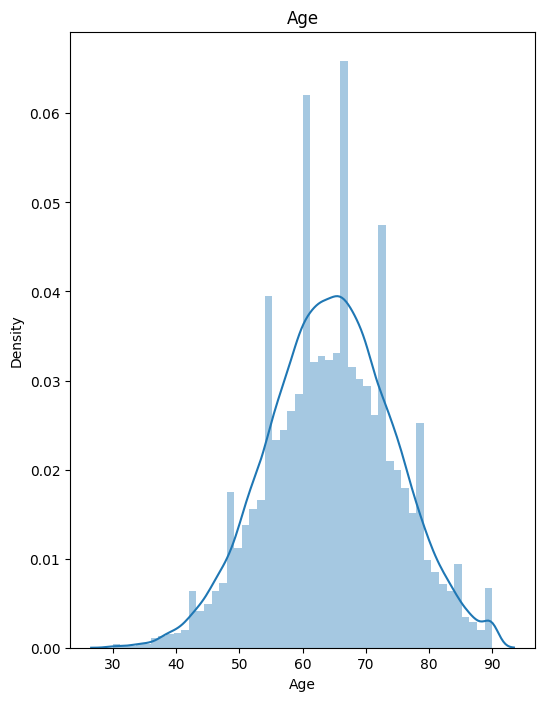

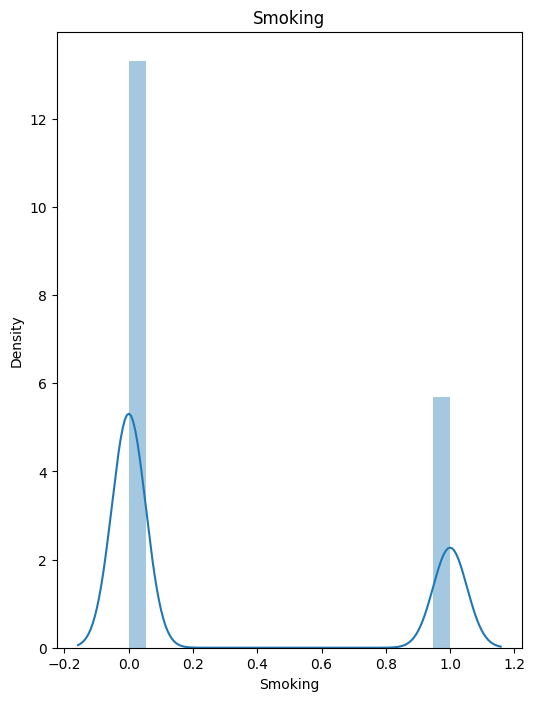

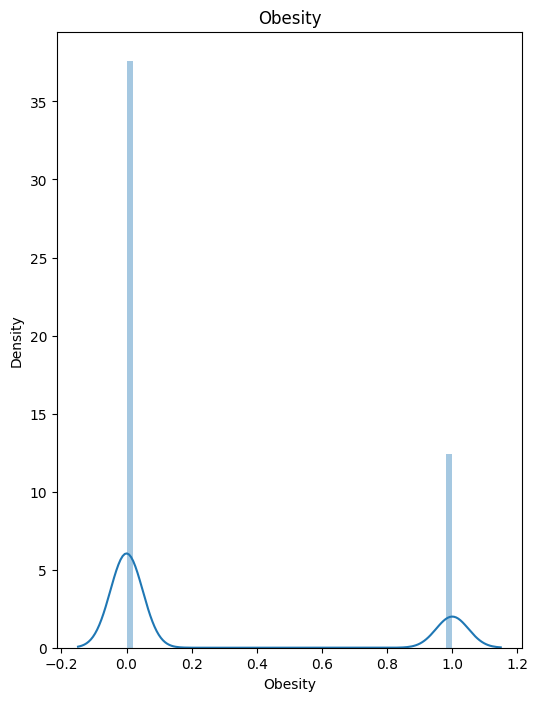

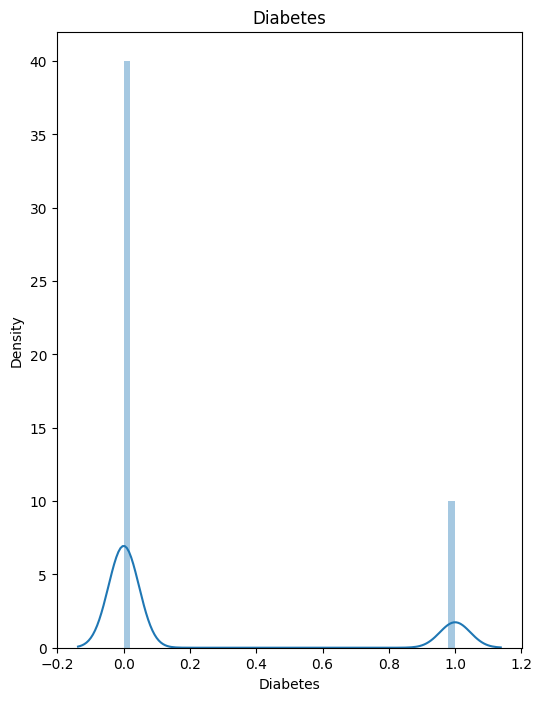

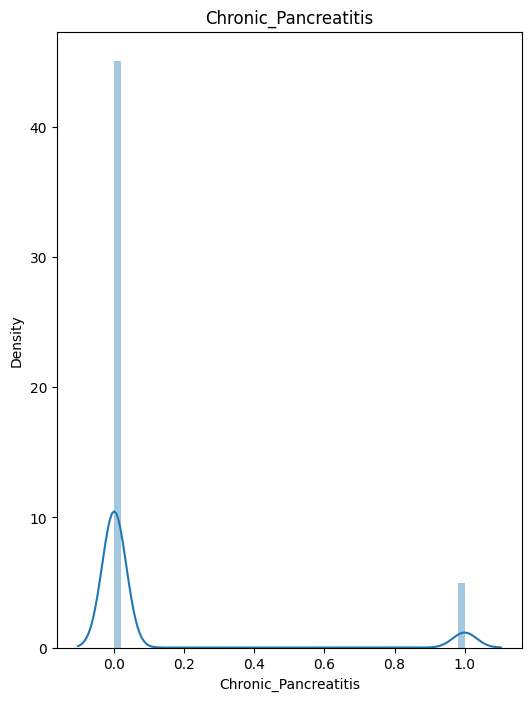

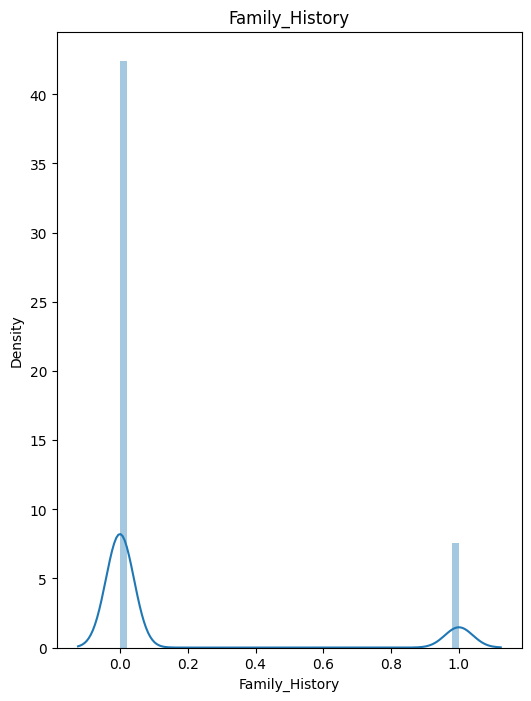

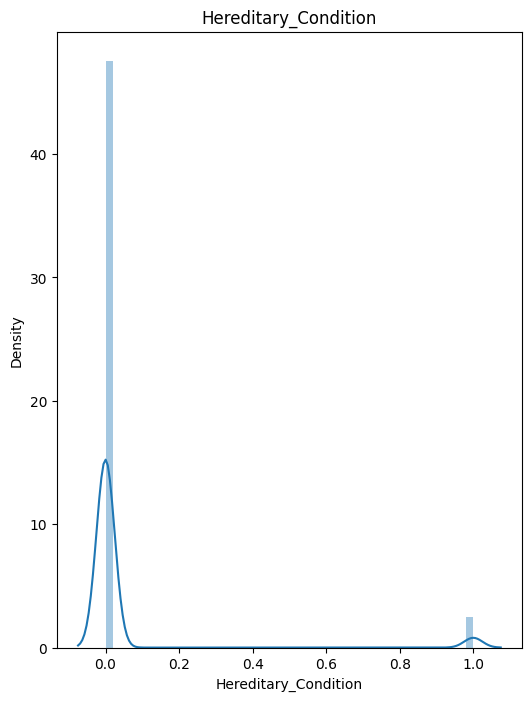

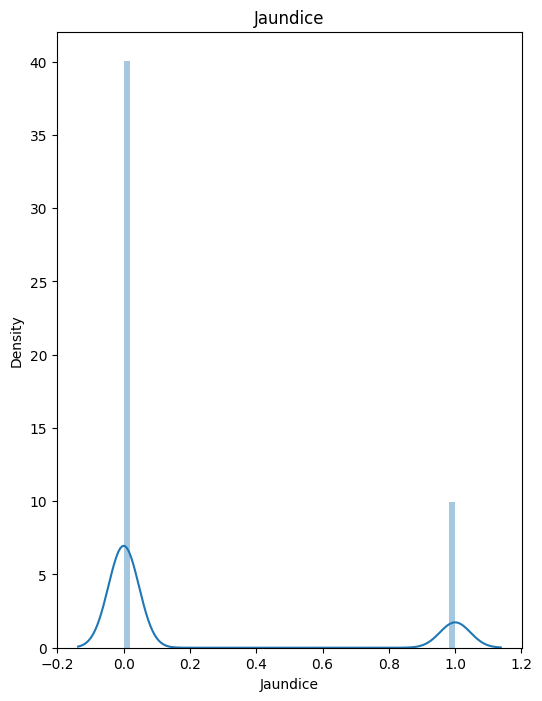

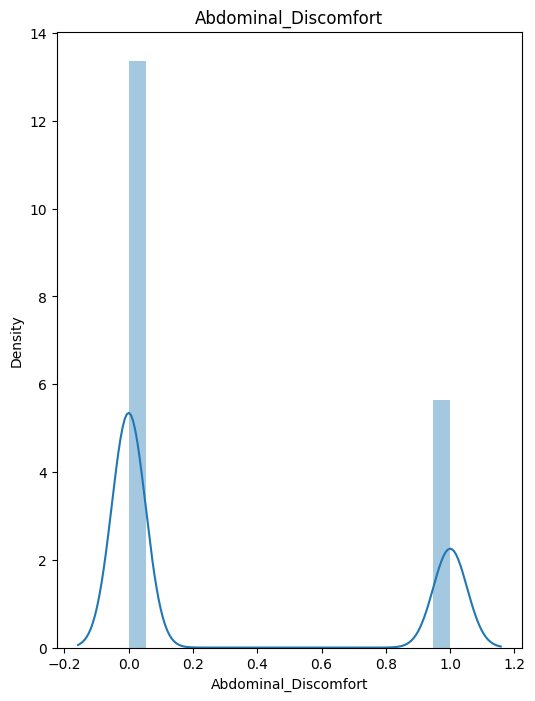

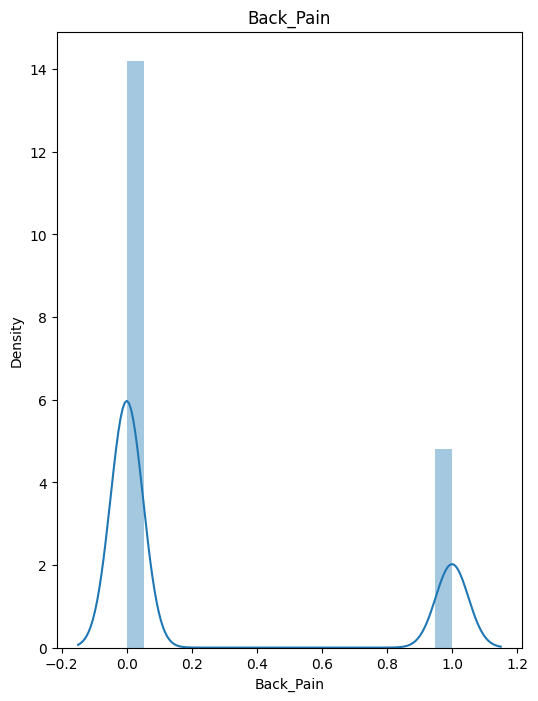

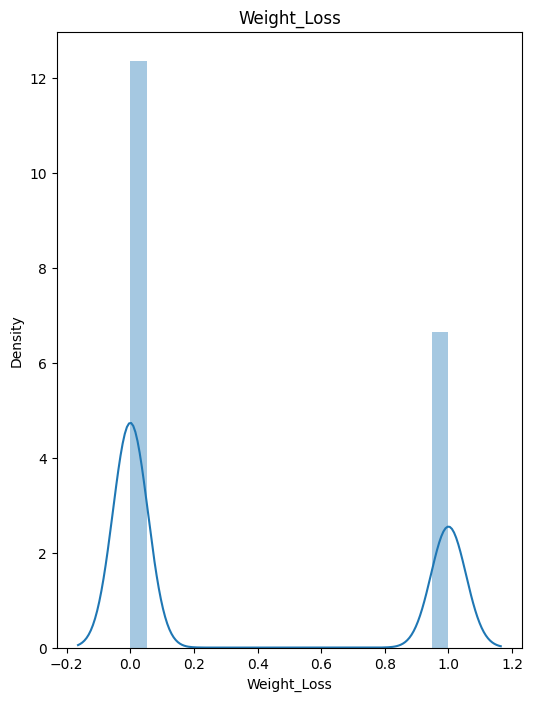

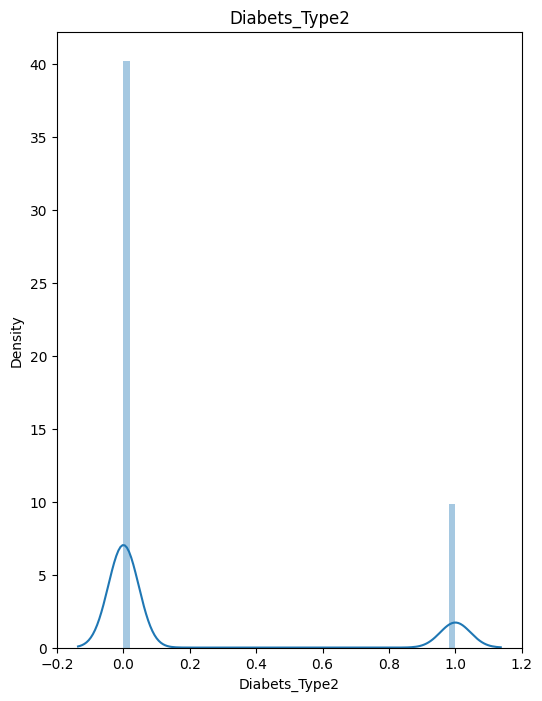

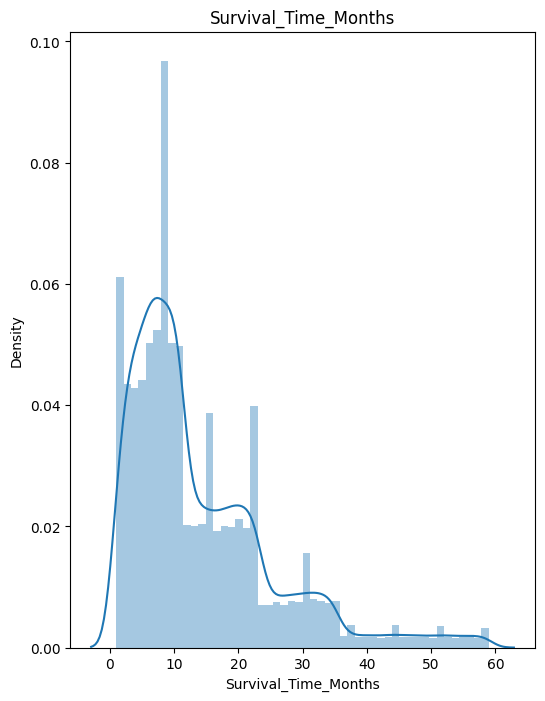

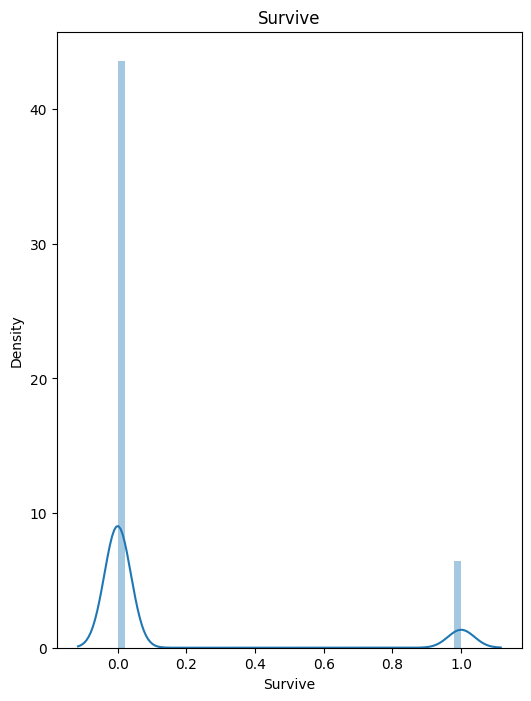

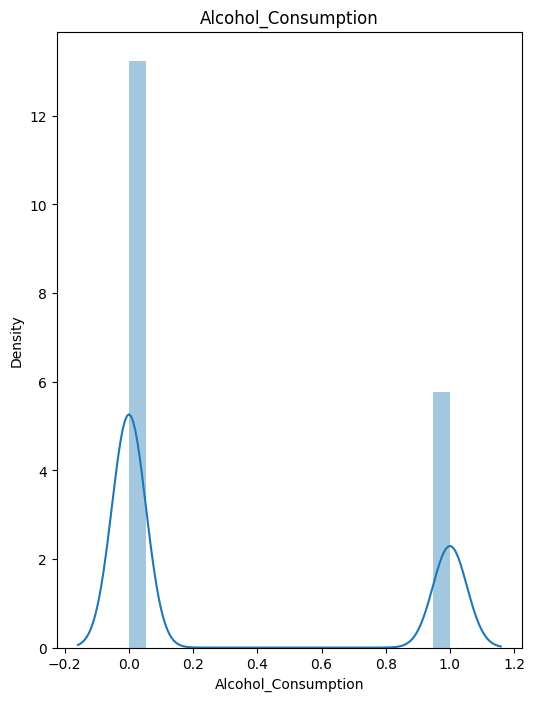

In [19]:
#data visualisation displot on int column
for i in col_num:
  plt.figure(figsize=(6,8))
  sns.distplot(df[i])
  plt.title(i)
  plt.show()

***Save the csve after cleaning:-***

In [20]:
#save csv file after cleaning
df.to_csv('pancreatic_cancer_prediction_cleaned.csv',index=False)

In [21]:
# #drop uncessary column and some column has direct influence column
df.drop(columns=['Country','Survival_Time_Months','Urban_vs_Rural','Economic_Status'],inplace=True)

In [22]:
col_cate=df.select_dtypes(include='object').columns
col_cate

Index(['Gender', 'Stage_at_Diagnosis', 'Treatment_Type',
       'Physical_Activity_Level', 'Diet', 'Access_to_Healthcare'],
      dtype='object')

In [23]:
#copy the dataset
df1=df.copy()

#***Label Encoding:-***

In [24]:
encoder={}

In [25]:
le=LabelEncoder()
for i in col_cate:
   df[i]=le.fit_transform(df[i])
   encoder[i]=le

In [26]:
df.head()

,Age,Gender,Smoking,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,Abdominal_Discomfort,Back_Pain,Weight_Loss,Diabets_Type2,Stage_at_Diagnosis,Treatment_Type,Survive,Alcohol_Consumption,Physical_Activity_Level,Diet,Access_to_Healthcare
0,64,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,2,1,0
1,77,1,1,1,0,0,0,0,0,0,0,0,1,2,0,0,1,2,2,2
2,71,0,0,0,0,0,0,0,0,0,0,1,1,3,0,1,0,2,0,1
3,56,1,0,0,0,0,1,0,1,0,0,0,1,3,1,0,1,1,1,2
4,82,0,0,0,0,0,1,0,0,0,0,0,0,3,0,1,0,1,2,2


#correlation:-

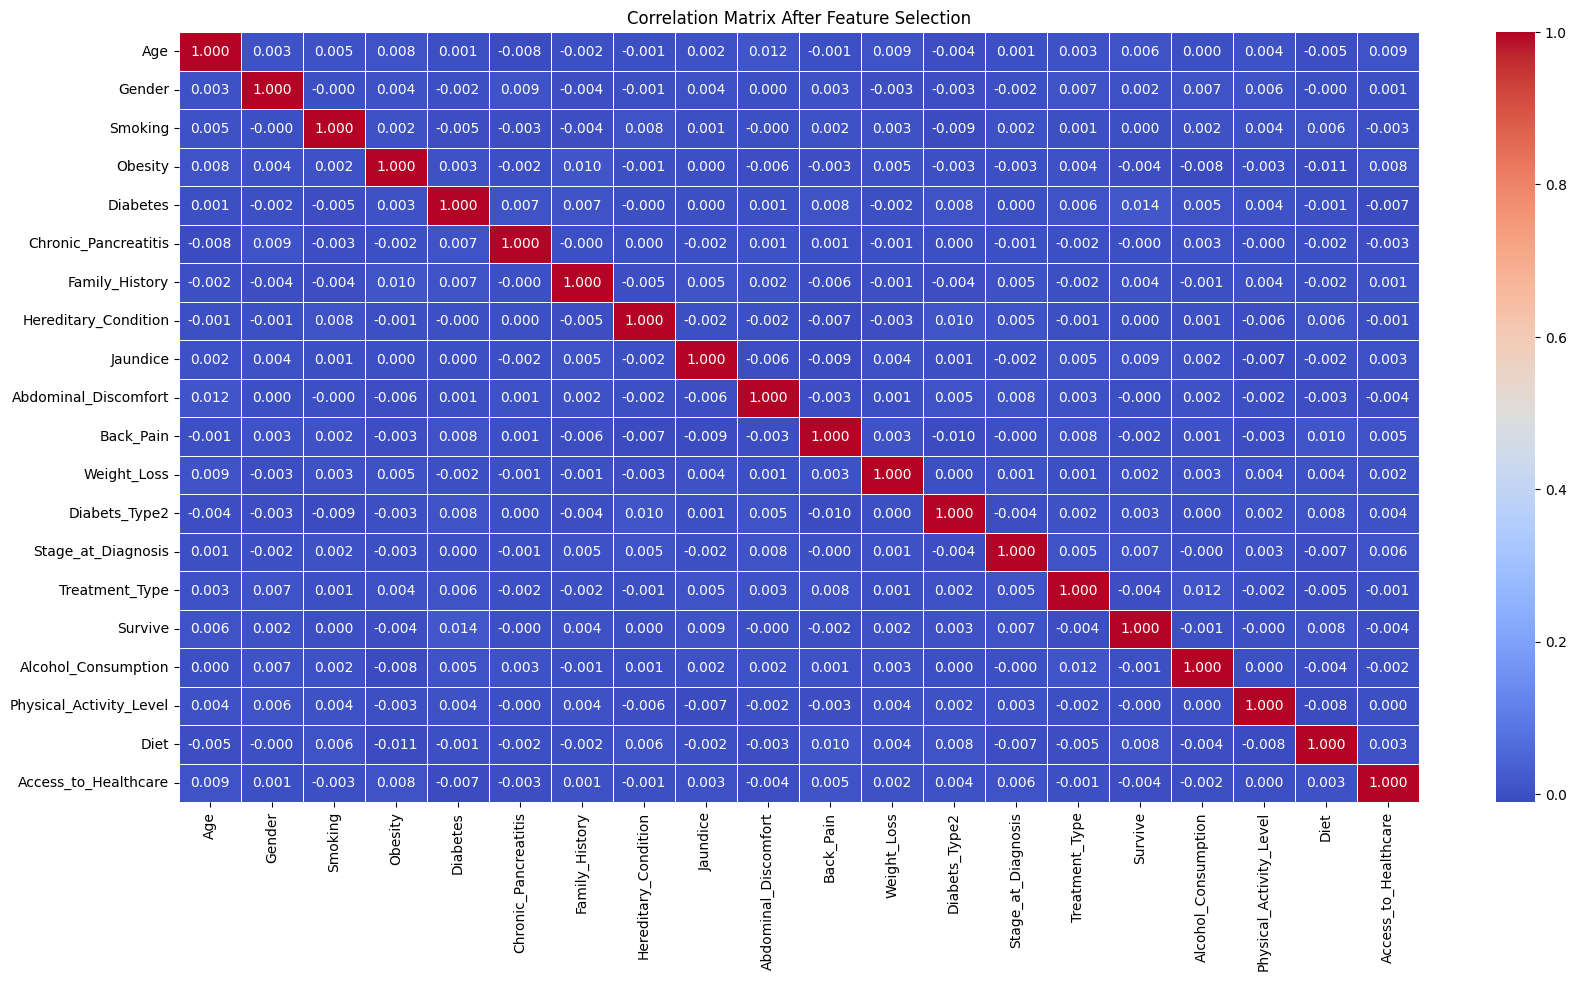

In [27]:
# #correlation features+
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix After Feature Selection")
plt.show()

#***Spliting the dataset:-***

In [28]:
# Define features and target
X = df.drop(columns=["Survive"])
y = df["Survive"]

In [29]:
#check target column distribution
y.value_counts()

,count
Survive,
0,43574
1,6422


#***Balancing the target columns:-***



In [30]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

In [31]:
#check the target column value count balaced
y.value_counts()

,count
Survive,
0,43574
1,43574


In [32]:
#shape of X
X.shape

(87148, 19)

#***Feature Selection:-***

In [33]:
# Apply Chi-Square Test for feature selection
chi_selector = SelectKBest(score_func=chi2, k=15)  # Select top 10 features
X_chi = chi_selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[chi_selector.get_support()]
print(f"Selected Features (Chi-Square): {selected_features.tolist()}")

Selected Features (Chi-Square): ['Gender', 'Smoking', 'Obesity', 'Diabetes', 'Chronic_Pancreatitis', 'Family_History', 'Hereditary_Condition', 'Jaundice', 'Abdominal_Discomfort', 'Back_Pain', 'Weight_Loss', 'Diabets_Type2', 'Treatment_Type', 'Alcohol_Consumption', 'Physical_Activity_Level']


In [34]:
#feature impotance according to randomforestclassifier
rfc=RandomForestClassifier()
rfc.fit(X, y)
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print important features
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Age                        0.348764
Stage_at_Diagnosis         0.089176
Diet                       0.068886
Access_to_Healthcare       0.066542
Physical_Activity_Level    0.064549
Treatment_Type             0.058873
Gender                     0.031820
Weight_Loss                0.026163
Smoking                    0.025619
Alcohol_Consumption        0.025278
Obesity                    0.024753
Abdominal_Discomfort       0.024159
Back_Pain                  0.023618
Diabetes                   0.023210
Jaundice                   0.022197
Diabets_Type2              0.022196
Family_History             0.020819
Chronic_Pancreatitis       0.019252
Hereditary_Condition       0.014125
dtype: float64


In [35]:
#Drop the column that not relevent to target column as per feature impotance and chi2-square
X.drop(columns=['Hereditary_Condition','Jaundice','Family_History','Chronic_Pancreatitis','Diabetes'],axis=1,inplace=True)

In [36]:
X.shape

(87148, 14)

In [37]:
#spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (69718, 14)
Testing set shape: (17430, 14)


#***Choose the Best Model:-***

In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

In [41]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.6514
Random Forest Accuracy: 0.8250
SVM Accuracy: 0.6515
Decision Tree Accuracy: 0.7862
KNN Accuracy: 0.7491


#***Training the Best model:-***

In [44]:
RFC=RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

#***Save the model:-***

In [47]:
# Save encoders for future use
joblib.dump(encoder, "label_encoders.pkl")
print("Label encoders saved successfully.")

Label encoders saved successfully.


In [48]:
#save the model
joblib.dump(RFC,'Best_model.pkl')
print("Best Model save Sucessfully")

Best Model save Sucessfully
